<a href="https://colab.research.google.com/github/sahibpreetsingh12/100daysofcode/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


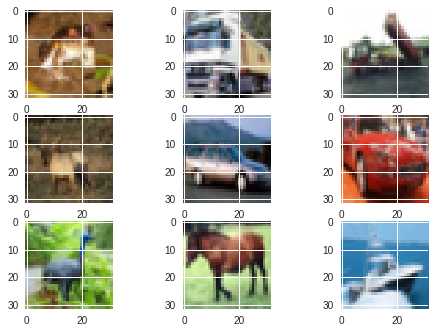

In [112]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()

In [0]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils



In [0]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [119]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
__________

In [120]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 18s 367us/step - loss: 1.6930 - acc: 0.3920 - val_loss: 1.3913 - val_acc: 0.5094
Epoch 2/5
50000/50000 [==============================] - 18s 350us/step - loss: 1.3391 - acc: 0.5185 - val_loss: 1.2559 - val_acc: 0.5520
Epoch 3/5
50000/50000 [==============================] - 18s 350us/step - loss: 1.2274 - acc: 0.5652 - val_loss: 1.1588 - val_acc: 0.5923
Epoch 4/5
50000/50000 [==============================] - 18s 351us/step - loss: 1.1585 - acc: 0.5891 - val_loss: 1.1269 - val_acc: 0.6031
Epoch 5/5
50000/50000 [==============================] - 18s 350us/step - loss: 1.1048 - acc: 0.6088 - val_loss: 1.0922 - val_acc: 0.6116
Accuracy: 61.16%


# **Preoroceeing the image to be tested**
Below we created **predictor** and **test** methpd these are general methods from preprocessing image to be supplied to any CNN 
but we have actually used **predict** and **predict_classes** that come packed with ***Sequential*** class of Keras

In [0]:
# General format on how we give data to our custom model
from keras.preprocessing import image
import numpy as np
def predictor(path):
    img_path = path
    
    new_image = test(img_path)
    print(new_image.shape)
    
    return new_image
def test(img_path, show=False):
  
  img = image.load_img(img_path, target_size=(32, 32))
  img_tensor = image.img_to_array(img)                    # (height, width, channels)
  img_tensor = np.expand_dims(img_tensor, axis=0)  # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
  img_tensor /= 255.  
  return img_tensor

In [124]:
h=predictor('cats.jpg')


(1, 3, 32, 32)


In [121]:

CATEGORIES = ["airplane", "automobile",'bird','cat','deer','dog','frog','horse','ship','truck']
test_image = X_test[0:1]#taking 0th image from Cifar Dataset
print (test_image.shape,'\n')#this prooves we have same dimension as we have to feed to model because variable 'h' above also has same dimension
print(model.predict(test_image))#predicting probabilities of each class using predict function of Sequential Class
print(model.predict_classes(test_image))#predicting class of testing image 
print(CATEGORIES[int(model.predict_classes(test_image))])#converting that number to integer and then finding name of that variable
print(y_test[0:1])

(1, 3, 32, 32) 

[[0.00326899 0.00095861 0.07653695 0.6058647  0.02774197 0.25355718
  0.0179479  0.00549301 0.00795156 0.00067912]]
[3]
cat
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


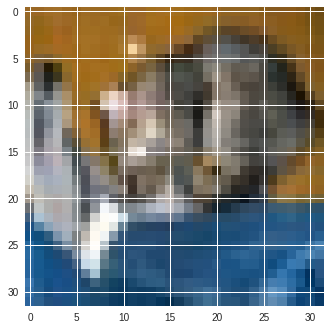

In [122]:
pyplot.imshow(toimage(X_test[0]))#this gives us proof that oour first image is of cat
pyplot.show()